[![Open In colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/AnalisisDeDatos/3_Agrupacion_y_Agregacion/agrupacion_agregacion.ipynb)

# Data Wrangling Avanzado


## Tabla de Contenidos

    I. Pandas y Cadenas de Texto (Strings)
        I. Introducción
        II. Metodos para manipular strings
        III. RegExp 
        IV. Melt
        V. Pivot table
    II. OLAP vs OLTP
    III. Series de Tiempo (Time Series)
        I. datetime y funciones para manejo de series de tiempo
        II. Rolling Windows y Moving Average
        III. Simple Exponential Smoothing
        IV. Shift y Diff
        V. Ejercicios

## Introducción

En esta clase vamos a ver cómo hacer manejo avanzado de datos a partir, tanto en cadenas de caracteres como en series de tiempo. El primer dataset que vamos a utilizar es del portal de datos abiertos de España.

In [1]:
# !pip install seaborn
# !pip install numpy==1.18.5

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('https://datasets-humai.s3.amazonaws.com/datasets/parodesprov.csv')

In [4]:
df.head()

,OBJECTID,Codigo,Texto,Cod_Prov,Cod_CCAA,TotalParoRegistrado,PAD_1C02,PAD_1_COD_PROV,PAD_1_COD_CCAA,Shape__Area,Shape__Length,Codigop
0,1,1001,Alegría-Dulantzi,1,16,184.0,2856.0,Araba/Álava,16.0,3.709269e+07,48191.568537,1.0
1,2,1002,Amurrio,1,16,766.0,10260.0,Araba/Álava,16.0,1.799114e+08,90623.621986,1.0
2,3,1003,Aramaio,1,16,18.0,1502.0,Araba/Álava,16.0,1.377066e+08,58592.914048,1.0
3,4,1004,Artziniega,1,16,110.0,1840.0,Araba/Álava,16.0,5.130078e+07,31498.524044,1.0
4,5,1006,Armiñón,1,16,12.0,234.0,Araba/Álava,16.0,2.380288e+07,33293.805036,1.0


Generalmente cuando en un dataset encontramos campos de texto es recomendable analizar si la carga se hizo con un buen criterio y no hay errores en la carga. Vamos a prestar atención a los campos Texto y PAD_1_COD_PROV.

In [5]:
df["Texto"].head()

0    Alegría-Dulantzi
1             Amurrio
2             Aramaio
3          Artziniega
4             Armiñón
Name: Texto, dtype: object

Noten que el primer valor incluye un "-" como separador

Vamos a comenzar eliminando las filas que tienen null el campo Texto, para facilitar el análisis posterior.

In [6]:
df = df[~df["Texto"].isnull()]

## Pandas y Cadenas de caracteres

Cuando una pd.Series es de tipo object Pandas permite acceder a métodos para operar sobre strings llamando al método **.str**.

### count

El método **.str.count()** permite contar cuántas ocurrencias de un patrón hay en una Series. Para ello se puede pasar una regex. Las regex o expresiones regulares son una cadena de caracteres que define una búsqueda de un patrón. En esta clase no vamos a ahondar en regex pero sí podemos mencionar que:
- Si pasamos un carácter en particular nos va a matchear cuántas veces aparece.
- El carácter . funcion como comodín, con lo cual cualquier caracter va a matchear.

Entonces, si queremos saber cuántas veces aparece el símbolo "-" en cada término podemos hacer:

In [7]:
df["Texto"].str.count("-").head()

0    1
1    0
2    0
3    0
4    0
Name: Texto, dtype: int64

Ahora, nos llama la atención que el símbolo "-" aparece en la primera fila, ¿será algo común?

In [8]:
df["Texto"].str.count("-").value_counts()

0    16009
1      222
2        4
Name: Texto, dtype: int64

### Ejercicio

1- Ver los casos que tiene 2 "-" en el nombre.

In [9]:
df["Texto"][df["Texto"].str.count("-") == 2]

4460     Lozoyuela-Navas-Sieteiglesias
4809          Oroz-Betelu/Orotz-Betelu
12630    Lozoyuela-Navas-Sieteiglesias
12979         Oroz-Betelu/Orotz-Betelu
Name: Texto, dtype: object

2- Graficar un histograma con la cantidad de caracteres en la columna Texto usando contains. Tip: pueden usar el método .hist.

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

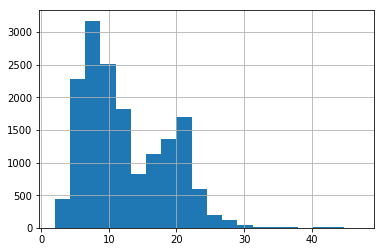

In [11]:
df["Texto"].str.count(".").hist(bins=20)

3- Mostrar que el resultado obtenido en el ejercicio anterior equivale a aplicar **.str.len()**. Para ello usen el método **pd.Series.equals()** y comparen el método usado en el ejercicio anterior con aplicar .str.len()

In [12]:
df["Texto"].str.count(".").equals(df["Texto"].str.len())

True

### contains

Digamos que queremos encontrar nombres de ciudades vascas. Para ello sabemos que "herri" en Euskera significa lugar, con lo que esperamos encontrar "erri" en una gran cantidad de ciudades. Vamos a filtrar trayendo solamente las ciudades que incluyen "erri" dentro de su nombre con el método **.str.contains**.

In [13]:
df[df["Texto"].str.contains("erri",case=False)].head() # case es para considerar mayúsculas y minúsculas o no

,OBJECTID,Codigo,Texto,Cod_Prov,Cod_CCAA,TotalParoRegistrado,PAD_1C02,PAD_1_COD_PROV,PAD_1_COD_CCAA,Shape__Area,Shape__Length,Codigop
33,34,1046,Erriberagoitia/Ribera Alta,1,16,26.0,745.0,Araba/Álava,16.0,2.227260e+08,114217.030007,1.0
34,35,1047,Ribera Baja/Erribera Beitia,1,16,72.0,1353.0,Araba/Álava,16.0,4.706702e+07,42082.113185,1.0
162,163,3025,Benferri,3,10,161.0,1920.0,Alicante/Alacant,10.0,2.002354e+07,21212.706211,3.0
2026,2027,13081,Terrinches,13,8,122.0,748.0,Ciudad Real,8.0,9.099513e+07,41739.202048,13.0
2506,2507,17056,Cornellà del Terri,17,9,55.0,2279.0,Girona,9.0,5.058085e+07,38058.585347,17.0


In [14]:
df[df["Texto"].str.contains("erri",case=False)].shape 

(48, 12)

### lower, upper y title

Supongamos que queremos estar seguros que las nombres están estandarizados... podemos elegir pasar todo a minúscula o a mayúscula de la siguiente manera:

In [15]:
df["Texto"].str.lower().head()

0    alegría-dulantzi
1             amurrio
2             aramaio
3          artziniega
4             armiñón
Name: Texto, dtype: object

In [16]:
df["Texto"].str.upper().head()

0    ALEGRÍA-DULANTZI
1             AMURRIO
2             ARAMAIO
3          ARTZINIEGA
4             ARMIÑÓN
Name: Texto, dtype: object

También podemos aplicar mayúscula a la primera letra y al resto minúscula, con **.str.title**. Este método toma en consideración espacios o símbolos no alfabéticos. Es decir, va a comenzar con mayúscula los términos después de un espacio, "-" o "/". Por ejemplo

In [17]:
df["Texto"][df["Texto"].str.count("-") == 2].str.title()

4460     Lozoyuela-Navas-Sieteiglesias
4809          Oroz-Betelu/Orotz-Betelu
12630    Lozoyuela-Navas-Sieteiglesias
12979         Oroz-Betelu/Orotz-Betelu
Name: Texto, dtype: object

### split

En el ejemplo anterior encontramos el uso de "/". En este caso se refiere a que el nombre de la ciudad (Oroz-Betelu/Orotz-Betelu) tiene dos nombres oficiales, uno en español y otro en vasco.

Supongamos que queremos estandarizar el problema y quedarnos sólo con el nombre que aparece primero, ¿cómo podemos hacerlo?

Primero veamos algunos ejemplos otros ejemplos de nombres con "/":

In [18]:
df["Texto"][df["Texto"].str.count("/") > 0].unique()[:10]

array(['Ayala/Aiara', 'Baños de Ebro/Mañueta', 'Campezo/Kanpezu',
       'Elburgo/Burgelu', 'Elvillar/Bilar', 'Labastida/Bastida',
       'Lanciego/Lantziego', 'Laudio/Llodio',
       'Moreda de Álava/Moreda Araba', 'Erriberagoitia/Ribera Alta'],
      dtype=object)

Nota: en un primer momento uno podría pensar que en este dataset el primer elemento debería ser siempre el nombre en, por ejemplo, español y el segundo en vasco... Sin embargo, no es así :-S

Vamos a usar **.str.split()**, vale la pena mencionar que el método devuelve una lista con un elemento por cada separación que pudo realizar. Para ello recibe como parámetro un string que es un patrón que va a usar, justamente, para dividir la cadena de caracteres. Comúnmente sólo vamos a pasarle un elemento por el cual splitear.

In [19]:
df["Texto"].str.split() # por default split separa por espacios en blanco

0               [Alegría-Dulantzi]
1                        [Amurrio]
2                        [Aramaio]
3                     [Artziniega]
4                        [Armiñón]
                   ...            
16334                       [Biel]
16335                   [Marracos]
16336    [Villamayor, de, Gállego]
16337                      [Ceuta]
16338                    [Melilla]
Name: Texto, Length: 16235, dtype: object

Noten en el ejemplo anterior que si devuelve una lista con un solo elemento es que no matcheó y, por lo tanto, no dividió el string.

Yendo a nuestro problema, separamos por el caracter '/'. Notar como se transforman los nombres compuestos
MUCHO CUIDADO! Nuestros strings ahora son listas!! :o

In [20]:
df["Texto"].str.split("/").head()

0    [Alegría-Dulantzi]
1             [Amurrio]
2             [Aramaio]
3          [Artziniega]
4             [Armiñón]
Name: Texto, dtype: object

Entonces, nos quedamos con la primera versión del nombre al separar por "/"

In [28]:
texto_para_split = df["Texto"][df["Texto"].str.count("/") > 0] # guardo en una variable casos con /

texto_para_split.str.split("/").apply(lambda x: x[0]) # para indexar las listas tengo que usar apply

7                   Ayala
8           Baños de Ebro
12                Campezo
16                Elburgo
18               Elvillar
               ...       
15372              Novelé
15412             Sagunto
15447          Vilallonga
15705    Karrantza Harana
15757              Urduña
Name: Texto, Length: 234, dtype: object

Por otra parte, si quisiéramos guardar cada nombre en una columna separada podemos hacerlo usando la opción expand:

In [30]:
texto_para_split.str.split("/", expand=True)

,0,1
7,Ayala,Aiara
8,Baños de Ebro,Mañueta
12,Campezo,Kanpezu
16,Elburgo,Burgelu
18,Elvillar,Bilar
...,...,...
15372,Novelé,Novetlè
15412,Sagunto,Sagunt
15447,Vilallonga,Villalonga
15705,Karrantza Harana,Valle de Carranza


Podemos asignar el resultado de expand de la siguiente manera:

In [49]:
df[["nombre_1", "nombre_2"]] = df["Texto"].str.split("/", expand=True) # usamos el df original y expandimos

In [50]:
df[["nombre_1", "nombre_2"]].head() # vemos que hay nulls que nombre_2 porque tienen un solo nombre

,nombre_1,nombre_2
0,Alegría-Dulantzi,None
1,Amurrio,None
2,Aramaio,None
3,Artziniega,None
4,Armiñón,None


In [51]:
df.loc[~df["nombre_2"].isnull(), ["nombre_1", "nombre_2"]].head() # noten el filtro booleano

,nombre_1,nombre_2
7,Ayala,Aiara
8,Baños de Ebro,Mañueta
12,Campezo,Kanpezu
16,Elburgo,Burgelu
18,Elvillar,Bilar


# OLAP, OLTP y Tidy data

Existen diversas formas de organizar la información. En general, qué vamos a hacer con la información es clave para entender cómo organizarla. 

La sigla OLTP viene de Online transaction processing y se refiere a transacciones que ocurren en tiempo real. Un ejemplo típico son los ATMs (automated teller machine), más conocidos como "cajeros automáticos".


OLTP se refiere a los sistemas de base de datos tradicionales que conocemos, los cuales basan toda su operatoria en transacciones atomicas ( se hacen por completo o no se hacen ). Estos se conocen como sistemas transaccionales e implementan diferentes algoritmos a fin de asegurar que una no se generen errores ni competencias entre usuarios que estan intentando acceder a los mismos registros a la vez. 

OLAP por otra parte se refiere a todos los sistemas de base de datos utilizados para analisis y reportes de negocios, en los cuales se realizan diferentes operaciones de agregacion sobre los datos, a fin de proveer a los usuarios con informacion relevante. Estos sistemas no son online, generalmente se realizan procesos de carga y transformaciones masivas luego de varios dias, semana o meses. La informacion se segrega por dimensiones (dias, semanas, meses).

Tidy Data (Datos Ordenados) se refiere al proceso de ordenado de la data a fin de que sea utilizable en algun proceso de Machine Learning. 

## Melt WIP

El proceso de Melt(derretir) se refiere a transformar/masajear un dataset de una manera muy particular en el cual alguna columna funciona como identificador mientras las otras columnas consideradas variables no son modificadas. Veamos los ejemplos a continuacion para entenderlo mejor.

Para este ejemplo vamos a obtener un dataset nuevo sobre las canciones mas escuchadas del 2000.

Vamos a agregar la opcion de encoding para solucionar un problema con los caracteres usados.

### Tabla 1

|country|year|cases|population|
| --- | --- | --- | --- |
|Afghanistan|1999|745|19987071|
|Afghanistan|2000|2666|20595360|
|Brazil|1999|37737|172006362|
|Brazil|2000|80488|174504898|
|China|1999|212258|1272915272|
|China|2000|213766|1280428583|

### Tabla 2

|country|year|type|count|
| --- | --- | --- | --- |
|Afghanistan|1999|cases|745|
|Afghanistan|1999|population|19987071|
|Afghanistan|2000|cases|2666|
|Afghanistan|2000|population|20595360|
|Brazil|1999|cases|37737|
|Brazil|1999|population|172006362|

### Tabla 3

|country|year|rate|
| --- | --- | --- |
|Afghanistan|1999|745/19987071|
|Afghanistan|2000|2666/20595360|
|Brazil|1999|37737/172006362|
|Brazil|2000|80488/174504898|
|China|1999|212258/1272915272|
|China|2000|213766/1280428583|

### Tabla 4


|country|1999|2000|
| --- | --- | --- |
|Afghanistan|745|2666|
|Brazil|37737|80488|
|China|212258|213766|

|country|1999|2000|
| --- | --- | --- |
|Afghanistan|19987071|20595360|
|Brazil|172006362|174504898|
|China|1272915272|1280428583|

In [43]:
billboard = pd.read_csv('https://raw.githubusercontent.com/hadley/tidy-data/master/data/billboard.csv', warn_bad_lines=False, error_bad_lines=False, encoding='iso-8859-1')

Veamos primero como luce el dataset

In [45]:
billboard.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


¿Notan algo raro en el dataset?

Ejercicios: WIP preguntas sobre tidy data

Ahora veamos que hace la operacion de Melt sobre la columna B y C tomando la columna A como identificador

In [48]:
pd.melt(billboard, id_vars=["year", "artist.inverted", "track", "time", "genre", "date.entered", "date.peaked"])

,year,artist.inverted,track,time,genre,date.entered,date.peaked,variable,value
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,x1st.week,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,x1st.week,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,x1st.week,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,x1st.week,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,x1st.week,57.0
...,...,...,...,...,...,...,...,...,...
24087,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,2000-08-05,x76th.week,NaN
24088,2000,"Smith, Will",Freakin' It,3:58,Rap,2000-02-12,2000-02-12,x76th.week,NaN
24089,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,x76th.week,NaN
24090,2000,"Eastsidaz, The",Got Beef,3:58,Rap,2000-07-01,2000-07-01,x76th.week,NaN


Este metodo es particularmente util para re balancear datasets para procesos de Machine Learning

# Series de Tiempo

Las series de tiempo representan uno de los problemas mas interesantes en la ciencia de datos ya que refiere a eventos continuos y ordenados los cuales pueden ser independientes o tener alguna correlacion entre si. En este modulo veremos los metodos mas utilizados para manipular series de tiempo en pandas

## Datetime y metodos de manipulacion de series de tiempo

Para esta seccion vamos a utilizar el dataset de consumo energetico de Alemania.

In [3]:
df_time_series = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')

Primeramente vamos a evaluar el dataset

In [4]:
df_time_series.columns = ['Fecha', 'Consumo', 'Eolica', 'Solar', 'Suma']
df_time_series.tail(10)

,Fecha,Consumo,Eolica,Solar,Suma
4373,2017-12-22,1423.23782,228.773,10.065,238.838
4374,2017-12-23,1272.17085,748.074,8.450,756.524
4375,2017-12-24,1141.75730,812.422,9.949,822.371
4376,2017-12-25,1111.28338,587.810,15.765,603.575
4377,2017-12-26,1130.11683,717.453,30.923,748.376
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


Las columnas son las siguientes:
    - Date — La fecha (yyyy-mm-dd)
    - Consumo — Electricidad Consumida en GWh
    - Eolica — Produccion de energia eolica en GWh
    - Solar — Produccion de energia solar en GWh
    - Suma — Suma de las dos anteriores GWh

Antes de comenzar a explorar el dataset, veamos algunas funciones de pandas para crear fechas. El metodo to_datetime nos permite transformar un string en cierto formato a un objeto del tipo Timestamp, el cual consiste de una fecha y una hora. Podemos ver que acepta varios formatos

In [5]:
pd.to_datetime('2018-01-15 3:45pm')

Timestamp('2018-01-15 15:45:00')

In [6]:
pd.to_datetime('7/8/1952')

Timestamp('1952-07-08 00:00:00')

Lo primero que vamos a hacer es poner la fecha como indice de nuestro dataset. Esto va a crear un nuevo tipo de objeto llamado DatetimeIndex

In [ ]:
# TODO: hacer filtro por columna ademas de por indice

In [7]:
df_time_series.Fecha = pd.DatetimeIndex(df_time_series.Fecha)

In [8]:
df_time_series = df_time_series.set_index('Fecha')


In [9]:
df_time_series.tail(10)

,Consumo,Eolica,Solar,Suma
Fecha,,,,
2017-12-22,1423.23782,228.773,10.065,238.838
2017-12-23,1272.17085,748.074,8.450,756.524
2017-12-24,1141.75730,812.422,9.949,822.371
2017-12-25,1111.28338,587.810,15.765,603.575
2017-12-26,1130.11683,717.453,30.923,748.376
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131
2017-12-30,1215.44897,721.247,7.467,728.714


In [25]:
df_time_series.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

Primeramente vamos a agregar columnas que nos proporcionen mas informacion sobre las fechas

In [10]:

df_time_series['Anio'] = df_time_series.index.year
df_time_series['Mes'] = df_time_series.index.month
df_time_series['Dia'] = df_time_series.index.weekday_name
df_time_series.sample(5, random_state=0)

,Consumo,Eolica,Solar,Suma,Anio,Mes,Dia
Fecha,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


Como creamos el indice por las fechas, podemos localizar cualquier dia que querramos ahora

In [11]:
df_time_series.loc['2017-08-10']

Consumo     1351.49
Eolica      100.274
Solar         71.16
Suma        171.434
Anio           2017
Mes               8
Dia        Thursday
Name: 2017-08-10 00:00:00, dtype: object

Incluso podemos buscar rangos de fechas

In [12]:
df_time_series.loc['2014-01-20':'2014-01-22']

,Consumo,Eolica,Solar,Suma,Anio,Mes,Dia
Fecha,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,Monday
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,Tuesday
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,Wednesday


O buscar por algun mes en particular

In [13]:
df_time_series.loc['2016-05']

,Consumo,Eolica,Solar,Suma,Anio,Mes,Dia
Fecha,,,,,,,
2016-05-01,1078.602,179.870,147.931,327.801,2016,5,Sunday
2016-05-02,1405.185,81.868,197.183,279.051,2016,5,Monday
2016-05-03,1462.935,208.678,139.151,347.829,2016,5,Tuesday
2016-05-04,1430.136,84.961,174.185,259.146,2016,5,Wednesday
2016-05-05,1111.379,150.624,212.713,363.337,2016,5,Thursday
2016-05-06,1254.051,255.574,217.569,473.143,2016,5,Friday
2016-05-07,1149.938,315.362,215.963,531.325,2016,5,Saturday
2016-05-08,1072.653,390.557,217.819,608.376,2016,5,Sunday
2016-05-09,1403.845,360.421,207.427,567.848,2016,5,Monday


Ahora veamos como se ve nuestra data de consumo de energia

In [14]:
#! pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
df_time_series['Consumo'].plot(linewidth=0.5);

## Ventanas y Medias moviles

Las ventanas moviles se refiere a aplicar alguna operacion de agregacion, por ejemplo el promedio sobre un conjunto de datos ordenados a la vez, por ejemplo el promedio de los ultimos 6 dias sobre cada conjunto ordenado de 6 dias en el dataset. Veamos un ejemplo para entenderlo mejor

In [15]:
opsd_7d = df_time_series["Consumo"].rolling(6).mean()
opsd_7d.head(10)

Fecha
2006-01-01            NaN
2006-01-02            NaN
2006-01-03            NaN
2006-01-04            NaN
2006-01-05            NaN
2006-01-06    1371.668833
2006-01-07    1410.186000
2006-01-08    1381.430000
2006-01-09    1395.895000
2006-01-10    1415.844000
Name: Consumo, dtype: float64

Podemos observar como las primeras 5 mediciones son Nan, ya que utiliza los primeros 5 valores para calcular a partir del 6to dia la media. El valor en el 7mo dia va a ser calculado con los datos del 2do al 6to dia, y asi sucesivamente.

Este tipo de metodos son particularmente utiles en analisis financiero.

## Shift y Diff

La operacion de Shift, como su nombre lo dice traducido al castellano, desplazar los datos una cantidad N de periodos. Veamoslo con el ejemplo del consumo, suponiendo que quiero crear otra columna con el consumo total del periodo anterior para poder compararlo con el actual

In [40]:
df_time_series['ConsumoAyer'] = df_time_series['Suma'].shift(periods=1)


Veamos como quedo ahora el dataset

In [43]:
df_time_series.tail(10)

,Consumo,Eolica,Solar,Suma,Anio,Mes,Dia,ConsumoAyer
Fecha,,,,,,,,
2017-12-22,1423.23782,228.773,10.065,238.838,2017,12,Friday,266.352
2017-12-23,1272.17085,748.074,8.450,756.524,2017,12,Saturday,238.838
2017-12-24,1141.75730,812.422,9.949,822.371,2017,12,Sunday,756.524
2017-12-25,1111.28338,587.810,15.765,603.575,2017,12,Monday,822.371
2017-12-26,1130.11683,717.453,30.923,748.376,2017,12,Tuesday,603.575
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,Wednesday,748.376
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,Thursday,411.037
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,Friday,520.586
2017-12-30,1215.44897,721.247,7.467,728.714,2017,12,Saturday,614.131


Podemos observar como la columna 'ConsumoAyer' es el valor de la columna 'Suma' exactamente del periodo anterior. Esto se puede realizar con tantos periodos como uno desee, pero hay que tener cuidado porque al inicio de nuestro dataset van a quedar valores Nan por la cantidad de periodos que elijamos. Hay que evaluar con que valor completamos esos valores.

Por ultimo supongamos que deseamos hacer la diferencia fila a fila del valor de ayer con el valor de hoy para el consumo total. Aqui nos conviene utilizar el metodo diff.

In [47]:
df_time_series['Diferencia'] = df_time_series['Suma'].diff(1)

In [48]:
df_time_series.tail(10)

,Consumo,Eolica,Solar,Suma,Anio,Mes,Dia,ConsumoAyer,Diferencia
Fecha,,,,,,,,,
2017-12-22,1423.23782,228.773,10.065,238.838,2017,12,Friday,266.352,-27.514
2017-12-23,1272.17085,748.074,8.450,756.524,2017,12,Saturday,238.838,517.686
2017-12-24,1141.75730,812.422,9.949,822.371,2017,12,Sunday,756.524,65.847
2017-12-25,1111.28338,587.810,15.765,603.575,2017,12,Monday,822.371,-218.796
2017-12-26,1130.11683,717.453,30.923,748.376,2017,12,Tuesday,603.575,144.801
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,Wednesday,748.376,-337.339
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,Thursday,411.037,109.549
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,Friday,520.586,93.545
2017-12-30,1215.44897,721.247,7.467,728.714,2017,12,Saturday,614.131,114.583
